In [1]:
import json

data = []
with open("data/train.txt", "r") as f:
    for line in f:
        data.append(json.loads(line))

print(data[0]['article_id'])
print(data[0]['article_text'][:2])


PMC3872579
['a recent systematic analysis showed that in 2011 , 314 ( 296 - 331 ) million children younger than 5 years were mildly , moderately or severely stunted and 258 ( 240 - 274 ) million were mildly , moderately or severely underweight in the developing countries .', 'in iran a study among 752 high school girls in sistan and baluchestan showed prevalence of 16.2% , 8.6% and 1.5% , for underweight , overweight and obesity , respectively .']


In [2]:
import pandas as pd
df2 = pd.DataFrame(data)
df2

,article_id,article_text,abstract_text,labels,section_names,sections
0,PMC3872579,[a recent systematic analysis showed that in 2...,[<S> background : the present study was carrie...,None,"[INTRODUCTION, MATERIALS AND METHODS, Particip...",[[a recent systematic analysis showed that in ...
1,PMC3770628,[it occurs in more than 50% of patients and ma...,[<S> backgroundanemia in patients with cancer ...,None,"[Introduction, Patients and methods, Study des...",[[it occurs in more than 50% of patients and m...
2,PMC5330001,"[tardive dystonia ( td ) , a rarer side effect...",[<S> tardive dystonia ( td ) is a serious side...,None,"[INTRODUCTION, CASE REPORT, DISCUSSION, Declar...","[[tardive dystonia ( td ) , a rarer side effec..."
3,PMC4386667,"[lepidoptera include agricultural pests that ,...",[<S> many lepidopteran insects are agricultura...,None,"[1. Introduction, 2. Insect Immunity, 3. Signa...",[[lepidoptera include agricultural pests that ...
4,PMC4307954,[syncope is caused by transient diffuse cerebr...,[<S> we present an unusual case of recurrent c...,None,"[Introduction, Case report, Discussion, Confli...",[[syncope is caused by transient diffuse cereb...
...,...,...,...,...,...,...
119919,PMC3502213,[eukaryotic cells depend on vesicle - mediated...,[<S> long - distance trafficking of membranous...,None,"[Introduction, Motor-Dependent Transport of Ra...",[[eukaryotic cells depend on vesicle - mediate...
119920,PMC3198562,[as regards the selection criteria of the post...,[<S> aims and objectives : to study the stress...,None,"[INTRODUCTION, MATERIALS AND METHODS, Modeling...",[[fiber post systems are routinely used in res...
119921,PMC4436536,[in most of the peer review publications in th...,[<S> abstractbackgroundthe objective of this s...,None,"[Introduction, Methods, Results, Discussion, L...",[[in most of the peer review publications in t...
119922,PMC4251613,[the reveal registry is a longitudinal registr...,[<S> background : patients with pulmonary arte...,None,"[TRIAL REGISTRY:, Materials and Methods, REVEA...","[[], [the reveal registry is a longitudinal re..."


In [ ]:
import pandas as pd
import requests
import xml.etree.ElementTree as ET
from time import sleep
from tqdm import tqdm  # ✅ 加入 tqdm 進度條

# API 基本設定
API_URL = "https://www.ncbi.nlm.nih.gov/pmc/utils/idconv/v1.0/"  # 實際 endpoint
TOOL = "fulltext_labeling"  # 替換成你的 tool 名稱
EMAIL = "yuhsinl2@illinois.edu"  # 替換成你的 email

# 轉為字串清單
all_ids = df2['article_id'].astype(str).tolist()

# 記錄 id 對應的 pmcid
id_to_pmcid = {}

# 分批處理，每批最多 200 個
batch_size = 200
for i in tqdm(range(0, len(all_ids), batch_size), desc="Processing batches"):
    
    batch_ids = all_ids[i:i + batch_size]
    ids_param = ",".join(batch_ids)

    params = {
        "tool": TOOL,
        "email": EMAIL,
        "ids": ids_param
    }

    response = requests.get(API_URL, params=params)

    if response.status_code == 200:
        root = ET.fromstring(response.text)
        for record in root.findall(".//record"):
            requested_id = record.get("requested-id")
            pmid = record.get("pmid")
            id_to_pmcid[requested_id] = pmid
    else:
        print(f"Error on batch {i // batch_size + 1}: {response.status_code}")

    # 避免 API rate limit
    sleep(1)

# 新增 PMCID 欄位

df2['PMID'] = df2['article_id'].map(id_to_pmcid)

# 儲存結果
df2.to_csv('data/df2_with_pmcid.csv', index=False)
df2


Processing batches: 100%|██████████| 600/600 [11:36<00:00,  1.16s/it]


,article_id,article_text,abstract_text,labels,section_names,sections,PMID
0,PMC3872579,[a recent systematic analysis showed that in 2...,[<S> background : the present study was carrie...,None,"[INTRODUCTION, MATERIALS AND METHODS, Particip...",[[a recent systematic analysis showed that in ...,PMC3872579
1,PMC3770628,[it occurs in more than 50% of patients and ma...,[<S> backgroundanemia in patients with cancer ...,None,"[Introduction, Patients and methods, Study des...",[[it occurs in more than 50% of patients and m...,PMC3770628
2,PMC5330001,"[tardive dystonia ( td ) , a rarer side effect...",[<S> tardive dystonia ( td ) is a serious side...,None,"[INTRODUCTION, CASE REPORT, DISCUSSION, Declar...","[[tardive dystonia ( td ) , a rarer side effec...",PMC5330001
3,PMC4386667,"[lepidoptera include agricultural pests that ,...",[<S> many lepidopteran insects are agricultura...,None,"[1. Introduction, 2. Insect Immunity, 3. Signa...",[[lepidoptera include agricultural pests that ...,PMC4386667
4,PMC4307954,[syncope is caused by transient diffuse cerebr...,[<S> we present an unusual case of recurrent c...,None,"[Introduction, Case report, Discussion, Confli...",[[syncope is caused by transient diffuse cereb...,PMC4307954
...,...,...,...,...,...,...,...
119919,PMC3502213,[eukaryotic cells depend on vesicle - mediated...,[<S> long - distance trafficking of membranous...,None,"[Introduction, Motor-Dependent Transport of Ra...",[[eukaryotic cells depend on vesicle - mediate...,PMC3502213
119920,PMC3198562,[as regards the selection criteria of the post...,[<S> aims and objectives : to study the stress...,None,"[INTRODUCTION, MATERIALS AND METHODS, Modeling...",[[fiber post systems are routinely used in res...,PMC3198562
119921,PMC4436536,[in most of the peer review publications in th...,[<S> abstractbackgroundthe objective of this s...,None,"[Introduction, Methods, Results, Discussion, L...",[[in most of the peer review publications in t...,PMC4436536
119922,PMC4251613,[the reveal registry is a longitudinal registr...,[<S> background : patients with pulmonary arte...,None,"[TRIAL REGISTRY:, Materials and Methods, REVEA...","[[], [the reveal registry is a longitudinal re...",PMC4251613


In [1]:
import pandas as pd
df2 = pd.read_csv('data/df2_with_pmcid.csv')
df2

,article_id,article_text,abstract_text,labels,section_names,sections,PMID
0,PMC3872579,['a recent systematic analysis showed that in ...,['<S> background : the present study was carri...,NaN,"['INTRODUCTION', 'MATERIALS AND METHODS', 'Par...",[['a recent systematic analysis showed that in...,24381614.0
1,PMC3770628,['it occurs in more than 50% of patients and m...,['<S> backgroundanemia in patients with cancer...,NaN,"['Introduction', 'Patients and methods', 'Stud...",[['it occurs in more than 50% of patients and ...,24039403.0
2,PMC5330001,"['tardive dystonia ( td ) , a rarer side effec...",['<S> tardive dystonia ( td ) is a serious sid...,NaN,"['INTRODUCTION', 'CASE REPORT', 'DISCUSSION', ...","[['tardive dystonia ( td ) , a rarer side effe...",28250568.0
3,PMC4386667,['lepidoptera include agricultural pests that ...,['<S> many lepidopteran insects are agricultur...,NaN,"['1. Introduction', '2. Insect Immunity', '3. ...",[['lepidoptera include agricultural pests that...,25861461.0
4,PMC4307954,['syncope is caused by transient diffuse cereb...,['<S> we present an unusual case of recurrent ...,NaN,"['Introduction', 'Case report', 'Discussion', ...",[['syncope is caused by transient diffuse cere...,25667888.0
...,...,...,...,...,...,...,...
119919,PMC3502213,['eukaryotic cells depend on vesicle - mediate...,['<S> long - distance trafficking of membranou...,NaN,"['Introduction', 'Motor-Dependent Transport of...",[['eukaryotic cells depend on vesicle - mediat...,23181166.0
119920,PMC3198562,['as regards the selection criteria of the pos...,['<S> aims and objectives : to study the stres...,NaN,"['INTRODUCTION', 'MATERIALS AND METHODS', 'Mod...",[['fiber post systems are routinely used in re...,22025836.0
119921,PMC4436536,['in most of the peer review publications in t...,['<S> abstractbackgroundthe objective of this ...,NaN,"['Introduction', 'Methods', 'Results', 'Discus...",[['in most of the peer review publications in ...,26060616.0
119922,PMC4251613,['the reveal registry is a longitudinal regist...,['<S> background : patients with pulmonary art...,NaN,"['TRIAL REGISTRY:', 'Materials and Methods', '...","[[''], ['the reveal registry is a longitudinal...",24992469.0


In [9]:
df2 = df2.dropna(subset=['PMID'])
df2['PMID'] = df2['PMID'].astype(int)

In [7]:
df2

,article_id,article_text,abstract_text,labels,section_names,sections,PMID
0,PMC3872579,['a recent systematic analysis showed that in ...,['<S> background : the present study was carri...,NaN,"['INTRODUCTION', 'MATERIALS AND METHODS', 'Par...",[['a recent systematic analysis showed that in...,24381614
1,PMC3770628,['it occurs in more than 50% of patients and m...,['<S> backgroundanemia in patients with cancer...,NaN,"['Introduction', 'Patients and methods', 'Stud...",[['it occurs in more than 50% of patients and ...,24039403
2,PMC5330001,"['tardive dystonia ( td ) , a rarer side effec...",['<S> tardive dystonia ( td ) is a serious sid...,NaN,"['INTRODUCTION', 'CASE REPORT', 'DISCUSSION', ...","[['tardive dystonia ( td ) , a rarer side effe...",28250568
3,PMC4386667,['lepidoptera include agricultural pests that ...,['<S> many lepidopteran insects are agricultur...,NaN,"['1. Introduction', '2. Insect Immunity', '3. ...",[['lepidoptera include agricultural pests that...,25861461
4,PMC4307954,['syncope is caused by transient diffuse cereb...,['<S> we present an unusual case of recurrent ...,NaN,"['Introduction', 'Case report', 'Discussion', ...",[['syncope is caused by transient diffuse cere...,25667888
...,...,...,...,...,...,...,...
119919,PMC3502213,['eukaryotic cells depend on vesicle - mediate...,['<S> long - distance trafficking of membranou...,NaN,"['Introduction', 'Motor-Dependent Transport of...",[['eukaryotic cells depend on vesicle - mediat...,23181166
119920,PMC3198562,['as regards the selection criteria of the pos...,['<S> aims and objectives : to study the stres...,NaN,"['INTRODUCTION', 'MATERIALS AND METHODS', 'Mod...",[['fiber post systems are routinely used in re...,22025836
119921,PMC4436536,['in most of the peer review publications in t...,['<S> abstractbackgroundthe objective of this ...,NaN,"['Introduction', 'Methods', 'Results', 'Discus...",[['in most of the peer review publications in ...,26060616
119922,PMC4251613,['the reveal registry is a longitudinal regist...,['<S> background : patients with pulmonary art...,NaN,"['TRIAL REGISTRY:', 'Materials and Methods', '...","[[''], ['the reveal registry is a longitudinal...",24992469


In [2]:
import pandas as pd

df = pd.read_csv('data/binary_data.csv')
# df = df[2800000:4200000]

In [3]:
df

,ids,autobiography,bibliography,biography,case-control_studies,case_reports,clinical_conference,clinical_studies_as_topic,clinical_study,clinical_trial,...,retraction_of_publication,retrospective_studies,review,scientific_integrity_review,systematic_review,systematic_reviews_as_topic,twin_study,validation_study,veterinary_clinical_trial,veterinary_randomized_controlled_trial
0,9868216,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
1,9358420,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
2,10553438,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
3,31785634,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,28538805,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572361,9474670,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9572362,23685058,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9572363,18985570,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9572364,15682490,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
merged_df = pd.merge(df2, df, how='inner', left_on='PMID', right_on='ids')
merged_df

,article_id,article_text,abstract_text,labels,section_names,sections,PMID,ids,autobiography,bibliography,...,retraction_of_publication,retrospective_studies,review,scientific_integrity_review,systematic_review,systematic_reviews_as_topic,twin_study,validation_study,veterinary_clinical_trial,veterinary_randomized_controlled_trial
0,PMC3770628,['it occurs in more than 50% of patients and m...,['<S> backgroundanemia in patients with cancer...,NaN,"['Introduction', 'Patients and methods', 'Stud...",[['it occurs in more than 50% of patients and ...,24039403,24039403,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PMC5330001,"['tardive dystonia ( td ) , a rarer side effec...",['<S> tardive dystonia ( td ) is a serious sid...,NaN,"['INTRODUCTION', 'CASE REPORT', 'DISCUSSION', ...","[['tardive dystonia ( td ) , a rarer side effe...",28250568,28250568,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PMC4307954,['syncope is caused by transient diffuse cereb...,['<S> we present an unusual case of recurrent ...,NaN,"['Introduction', 'Case report', 'Discussion', ...",[['syncope is caused by transient diffuse cere...,25667888,25667888,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PMC3133512,['agenesis of the inferior vena cava ( ivc ) a...,['<S> background : agenesis of the inferior ve...,NaN,"['Background:', 'Case:', 'Conclusion:', 'Backg...",[['agenesis of the inferior vena cava ( ivc ) ...,21760745,21760745,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PMC3056325,['a review of the literature and an extensive ...,['<S> backgrounda review of the literature and...,NaN,"['Background', 'Case', 'Conclusion', 'Backgrou...",[['a review of the literature and an extensive...,21403786,21403786,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41849,PMC2526536,['mechanical valve thrombosis ( mvt ) may caus...,"['<S> in the present study , the authors inves...",NaN,"['INTRODUCTION', 'MATERIALS AND METHODS', 'RES...",[['mechanical valve thrombosis ( mvt ) may cau...,18583870,18583870,0,0,...,0,1,0,0,0,0,0,0,0,0
41850,PMC3853399,['squamous cell carcinoma ( scc ) of the thyro...,['<S> primary squamous cell carcinoma of the t...,NaN,"['INTRODUCTION', 'CASE REPORT', 'DISCUSSION']",[['squamous cell carcinoma ( scc ) of the thyr...,24347911,24347911,0,0,...,0,0,0,0,0,0,0,0,0,0
41851,PMC3324991,['although levodopa ( ld ) still remains the g...,['<S> the aim of this article is to provide a ...,NaN,['Role of dopamine agonists in the treatment o...,[['although levodopa ( ld ) still remains the ...,22500116,22500116,0,0,...,0,0,1,0,0,0,0,0,0,0
41852,PMC4215460,['fibromyalgia is a chronic pain syndrome of u...,['<S> fibromyalgia is a chronic pain syndrome ...,NaN,"['Introduction', 'Material and methods', 'Resu...",[['fibromyalgia is a chronic pain syndrome of ...,25379438,25379438,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
merged_df.to_csv('data/merged_df!!.csv', index=False)

In [1]:
import pandas as pd
merged_df = pd.read_csv('data/merged_df!!.csv')

In [12]:
merged_df = merged_df.drop(columns=['dcom'])

In [13]:
import requests
import re
import pandas as pd
from tqdm import tqdm

def fetch_dcom_bulk(pmids, chunk_size=200):
    """
    接收一個含 PubMed ID 的串列，將它們分批（每批最多 chunk_size 筆）呼叫 API。
    回傳一個 dict：{ pmid字串: dcom字串或None }
    """
    results = {}

    # 將所有pmids分塊，最多每塊200筆
    for i in tqdm(range(0, len(pmids), chunk_size)):
        chunk = pmids[i:i + chunk_size]
        # 用逗號把所有pmid串起來
        chunk_str = ",".join(str(p) for p in chunk)

        # 準備 API URL
        url = (
            "https://api.ncbi.nlm.nih.gov/lit/ctxp/v1/pubmed/"
            f"?format=medline&id={chunk_str}"
        )
        
        # 呼叫 API
        resp = requests.get(url, timeout=10)
        resp.raise_for_status()
        text = resp.text.strip()
        
        # 解析取得的 MEDLINE 文字：
        # 一般可用空行(\n\n)來分割不同文獻
        records = re.split(r'\n\s*\n', text)
        
        for record in records:
            # 擷取 PMID
            pmid_match = re.search(r"^PMID\s*-\s*(\d+)", record, re.MULTILINE)
            # 擷取 DCOM
            dcom_match = re.search(r"^DP\s*-\s*(\S+)", record, re.MULTILINE)
            
            if pmid_match:
                pmid_val = pmid_match.group(1)
                # 若沒找到 DCOM，則是 None
                dcom_val = dcom_match.group(1) if dcom_match else None
                results[pmid_val] = dcom_val
    
    return results

# === 使用範例 ===

# 假設這是你的 DataFrame，裡面有一欄 'ids' 放了 PMID
# df = pd.DataFrame({'ids': [9868216, 28377901, 10553438, ...]})

# 先整理出所有 PMID 的列表
pmid_list = merged_df['ids'].tolist()

# 一次向 API 批次抓取，回傳一個字典 { '9868216': '19991213', ... }
dcom_dict = fetch_dcom_bulk(pmid_list, chunk_size=200)

# 將結果回填到 DataFrame 的新欄位 'dcom'
# 注意：dcom_dict 的 key、df['ids'] 都要同樣類型才對得上
# 若 df['ids'] 是int，則可先轉成 str 來比對
merged_df['dp'] = merged_df['ids'].astype(str).map(dcom_dict)




100%|██████████| 210/210 [03:17<00:00,  1.06it/s]


In [25]:
merged_df

,article_id,article_text,abstract_text,labels,section_names,sections,PMID,ids,autobiography,bibliography,...,retrospective_studies,review,scientific_integrity_review,systematic_review,systematic_reviews_as_topic,twin_study,validation_study,veterinary_clinical_trial,veterinary_randomized_controlled_trial,dp
0,PMC3770628,['it occurs in more than 50% of patients and m...,['<S> backgroundanemia in patients with cancer...,NaN,"['Introduction', 'Patients and methods', 'Stud...",[['it occurs in more than 50% of patients and ...,24039403,24039403,0,0,...,0,0,0,0,0,0,0,0,0,2013
1,PMC5330001,"['tardive dystonia ( td ) , a rarer side effec...",['<S> tardive dystonia ( td ) is a serious sid...,NaN,"['INTRODUCTION', 'CASE REPORT', 'DISCUSSION', ...","[['tardive dystonia ( td ) , a rarer side effe...",28250568,28250568,0,0,...,0,0,0,0,0,0,0,0,0,2017
2,PMC4307954,['syncope is caused by transient diffuse cereb...,['<S> we present an unusual case of recurrent ...,NaN,"['Introduction', 'Case report', 'Discussion', ...",[['syncope is caused by transient diffuse cere...,25667888,25667888,0,0,...,0,0,0,0,0,0,0,0,0,2014
3,PMC3133512,['agenesis of the inferior vena cava ( ivc ) a...,['<S> background : agenesis of the inferior ve...,NaN,"['Background:', 'Case:', 'Conclusion:', 'Backg...",[['agenesis of the inferior vena cava ( ivc ) ...,21760745,21760745,0,0,...,0,0,0,0,0,0,0,0,0,2011
4,PMC3056325,['a review of the literature and an extensive ...,['<S> backgrounda review of the literature and...,NaN,"['Background', 'Case', 'Conclusion', 'Backgrou...",[['a review of the literature and an extensive...,21403786,21403786,0,0,...,0,0,0,0,0,0,0,0,0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41849,PMC2526536,['mechanical valve thrombosis ( mvt ) may caus...,"['<S> in the present study , the authors inves...",NaN,"['INTRODUCTION', 'MATERIALS AND METHODS', 'RES...",[['mechanical valve thrombosis ( mvt ) may cau...,18583870,18583870,0,0,...,1,0,0,0,0,0,0,0,0,2008
41850,PMC3853399,['squamous cell carcinoma ( scc ) of the thyro...,['<S> primary squamous cell carcinoma of the t...,NaN,"['INTRODUCTION', 'CASE REPORT', 'DISCUSSION']",[['squamous cell carcinoma ( scc ) of the thyr...,24347911,24347911,0,0,...,0,0,0,0,0,0,0,0,0,2013
41851,PMC3324991,['although levodopa ( ld ) still remains the g...,['<S> the aim of this article is to provide a ...,NaN,['Role of dopamine agonists in the treatment o...,[['although levodopa ( ld ) still remains the ...,22500116,22500116,0,0,...,0,1,0,0,0,0,0,0,0,2012
41852,PMC4215460,['fibromyalgia is a chronic pain syndrome of u...,['<S> fibromyalgia is a chronic pain syndrome ...,NaN,"['Introduction', 'Material and methods', 'Resu...",[['fibromyalgia is a chronic pain syndrome of ...,25379438,25379438,0,0,...,0,0,0,0,0,0,0,0,0,2014


In [24]:
dp_counts = merged_df['dp'].value_counts()
dp_counts.to_csv("data/dp_counts_a.csv", header=["count"])


每個 label 出現的次數：
case_reports: 21284
review: 10000
retrospective_studies: 2270
clinical_study: 2268
clinical_trial: 1699
prospective_studies: 1488
follow-up_studies: 1305
randomized_controlled_trial_humans: 1172
case-control_studies: 1100
cross-sectional_studies: 1042
reproducibility_of_results: 742
multicenter_study: 697
cohort_studies: 673
predictive_value_of_tests: 624
evaluation_study: 584
systematic_review: 567
comment: 528
clinical_studies_as_topic: 496
clinical_trials_as_topic: 480
historical_article: 376
meta-analysis: 362
longitudinal_studies: 298
double-blind_method: 288
editorial: 214
genome-wide_association_study: 187
random_allocation: 174
validation_study: 168
feasibility_studies: 164
practice_guidelines_as_topic: 155
letter: 138
cross-over_studies: 128
biography: 108
interviews_as_topic: 103
congress: 66
portrait: 41
meta-analysis_as_topic: 40
evaluation_studies_as_topic: 34
focus_groups: 32
veterinary_clinical_trial: 32
cross-cultural_comparison: 24
personal_narrative: 2

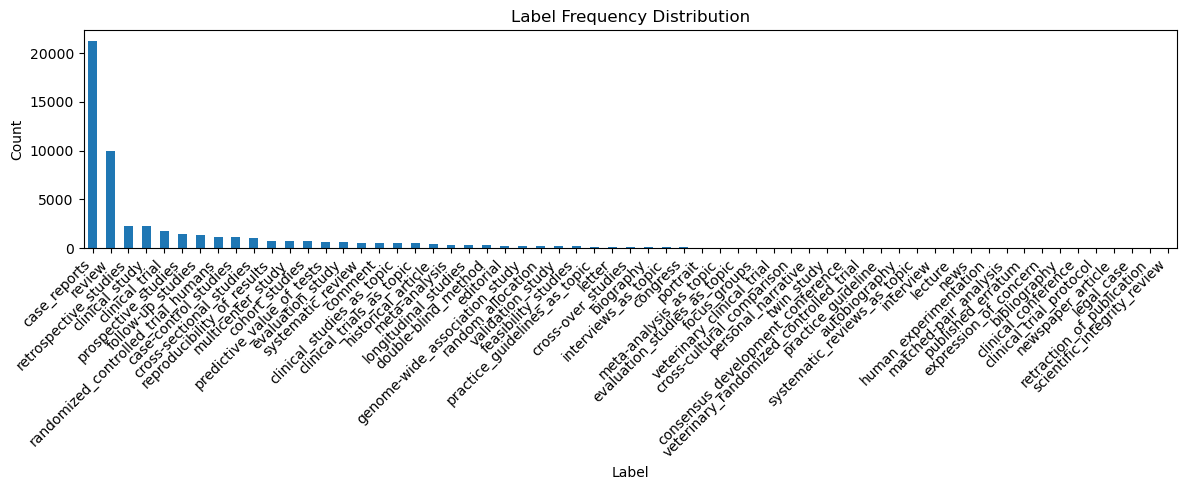

count    41854.000000
mean         1.249749
std          0.680765
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: num_labels, dtype: float64


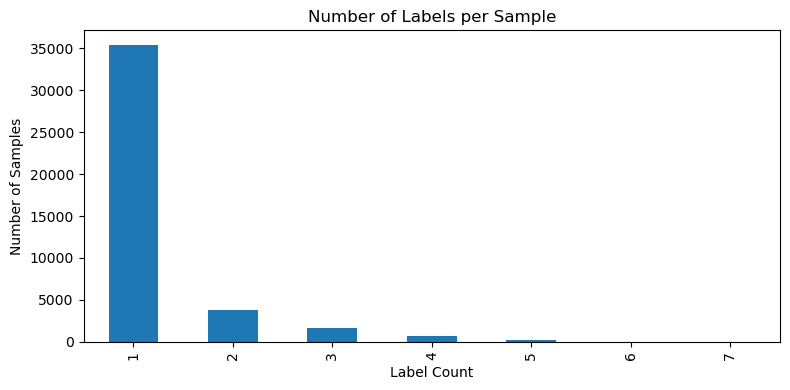

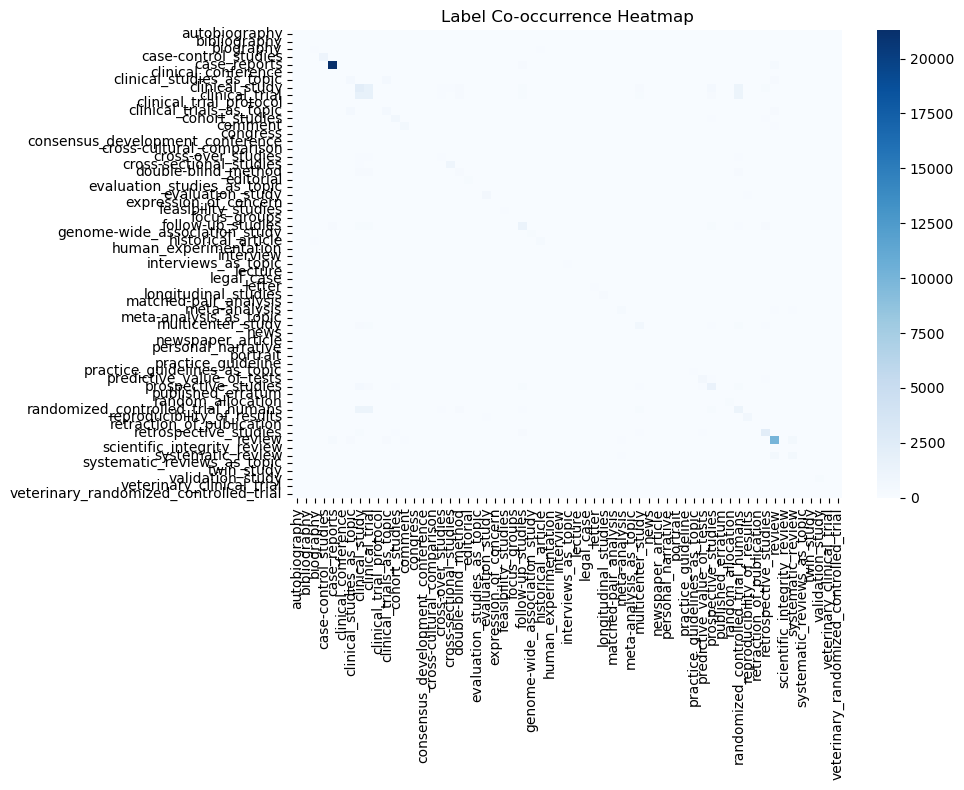

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 假設第一欄是 ids，剩下的是 one-hot labels
label_cols = merged_df.columns[8:]  # 你可以調整這個 index，如果 label 欄位不是從第 1 欄開始

# === Step 2: 計算每個 label 的出現次數 ===
label_counts = merged_df[label_cols].sum().sort_values(ascending=False)

# 顯示結果
print("每個 label 出現的次數：")
for index, value in label_counts.items():
    print(f"{index}: {value}")

# === Step 3: 視覺化 label 分布 ===
plt.figure(figsize=(12, 5))
label_counts.plot(kind='bar')
plt.title("Label Frequency Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# === Step 4: 每筆資料擁有幾個 label ===
merged_df['num_labels'] = merged_df[label_cols].sum(axis=1)

# 顯示基本統計
print(merged_df['num_labels'].describe())

# 視覺化
plt.figure(figsize=(8, 4))
merged_df['num_labels'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Labels per Sample")
plt.xlabel("Label Count")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

# === Step 5: Label Co-occurrence Matrix (可選) ===
co_occur = merged_df[label_cols].T.dot(merged_df[label_cols])
plt.figure(figsize=(10, 8))
sns.heatmap(co_occur, cmap='Blues', xticklabels=True, yticklabels=True)
plt.title("Label Co-occurrence Heatmap")
plt.tight_layout()
plt.show()


In [3]:
type(label_counts.sort_index())

pandas.core.series.Series

In [4]:
label_counts.sort_index().to_csv("data/label_counts_a.csv", header=["count"])
